In [15]:
import mdtraj as md
import numpy as np

In [16]:
t1 = md.load('/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/1_dddro3/md_nvt_25ns_100.dcd',\
             top='/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/1_dddro3/md_nvt_init.pdb')
t2=md.load('/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/1_dddro3/md_nvt_50ns_100.dcd',\
             top='/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/1_dddro3/md_nvt_25ns.pdb')
dddro3_t=t1.join(t2, check_topology=True, discard_overlapping_frames=True)

In [17]:
print(t1)
print(t2)

<mdtraj.Trajectory with 251 frames, 105351 atoms, 23390 residues, and unitcells>
<mdtraj.Trajectory with 251 frames, 105351 atoms, 23390 residues, and unitcells>


In [18]:
t1_top=t1.topology
t2_top=t2.topology
print(t1_top,t2_top)

<mdtraj.Topology with 22637 chains, 23390 residues, 105351 atoms, 80352 bonds> <mdtraj.Topology with 22637 chains, 23390 residues, 105351 atoms, 80352 bonds>


In [5]:
selection1 = t1.topology.select_expression('resid and resid 133')
print(selection1)

[atom.index for atom in topology.atoms if (atom.residue.index and (atom.residue.index == 133))]


In [6]:
print([atom for atom in t1.topology.atoms if ((atom.residue.name == 'TYR') and (atom.residue.index == 126))])

[TYR127-N, TYR127-H, TYR127-CA, TYR127-HA, TYR127-CB, TYR127-HB3, TYR127-HB2, TYR127-CG, TYR127-CD1, TYR127-HD1, TYR127-CE1, TYR127-HE1, TYR127-CZ, TYR127-OH, TYR127-HH, TYR127-CD2, TYR127-HD2, TYR127-CE2, TYR127-HE2, TYR127-C, TYR127-O]


In [7]:
print([residue for residue in t1.topology.chain(0).residues if residue.index  == 126])

[TYR127]


In [8]:
print([atom for atom in t1.topology.atoms if ((atom.residue.name == 'HEM') and (atom.residue.index == 0))])

[HEM1-OO, HEM1-FE, HEM1-NA, HEM1-NB, HEM1-NC, HEM1-ND, HEM1-C1A, HEM1-C2A, HEM1-C3A, HEM1-C4A, HEM1-C1B, HEM1-C2B, HEM1-C3B, HEM1-C4B, HEM1-C1C, HEM1-C2C, HEM1-C3C, HEM1-C4C, HEM1-C1D, HEM1-C2D, HEM1-C3D, HEM1-C4D, HEM1-CHA, HEM1-HA, HEM1-CHB, HEM1-HB, HEM1-CHC, HEM1-HC, HEM1-CHD, HEM1-HD, HEM1-CMA, HEM1-OMA, HEM1-HMA1, HEM1-CAA, HEM1-HAA1, HEM1-HAA2, HEM1-CBA, HEM1-HBA1, HEM1-HBA2, HEM1-CGA, HEM1-O1A, HEM1-O2A, HEM1-CMB, HEM1-HMB1, HEM1-HMB2, HEM1-HMB3, HEM1-C11, HEM1-O11, HEM1-H11A, HEM1-H11B, HEM1-C12, HEM1-H12A, HEM1-H12B, HEM1-C13, HEM1-H13A, HEM1-H13B, HEM1-C14, HEM1-H14A, HEM1-C15, HEM1-C26, HEM1-H26A, HEM1-H26B, HEM1-H26C, HEM1-C16, HEM1-H16A, HEM1-H16B, HEM1-C17, HEM1-H17A, HEM1-H17B, HEM1-C18, HEM1-H18A, HEM1-C19, HEM1-C27, HEM1-H27A, HEM1-H27B, HEM1-H27C, HEM1-C20, HEM1-H20A, HEM1-H20B, HEM1-C21, HEM1-H21A, HEM1-H21B, HEM1-C22, HEM1-H22A, HEM1-C23, HEM1-C25, HEM1-H25A, HEM1-H25B, HEM1-H25C, HEM1-C24, HEM1-H24A, HEM1-H24B, HEM1-C28, HEM1-H28A, HEM1-H28B, HEM1-C29, HEM1-H29A, 

In [10]:
##atom selection
tyr_133=[atom for atom in t1.topology.atoms if ((atom.residue.name == 'TYR') and (atom.residue.index == 126))]
print(tyr_133)
tyr_133_cg=tyr_133[7]
print(tyr_133_cg)

he3=[atom for atom in t1.topology.atoms if ((atom.residue.name == 'HEM') and (atom.residue.index == 0))]
he3_cad=he3[-9]
print(he3_cad)

[TYR127-N, TYR127-H, TYR127-CA, TYR127-HA, TYR127-CB, TYR127-HB3, TYR127-HB2, TYR127-CG, TYR127-CD1, TYR127-HD1, TYR127-CE1, TYR127-HE1, TYR127-CZ, TYR127-OH, TYR127-HH, TYR127-CD2, TYR127-HD2, TYR127-CE2, TYR127-HE2, TYR127-C, TYR127-O]
TYR127-CG
HEM1-CAD


In [11]:
##compute distances 
tyr_133_cg_he3_cad_pair= np.asarray([[tyr_133_cg.index, he3_cad.index]])

print(tyr_133_cg_he3_cad_pair)

tyr_133_cg_he3_cad_dist1=md.compute_distances(t1, tyr_133_cg_he3_cad_pair, periodic=True)
tyr_133_cg_he3_cad_dist2=md.compute_distances(t2, tyr_133_cg_he3_cad_pair, periodic=True)

print(tyr_133_cg_he3_cad_dist1[-1],tyr_133_cg_he3_cad_dist2[0])
tyr_133_cg_he3_cad_dist=np.concatenate((tyr_133_cg_he3_cad_dist1, tyr_133_cg_he3_cad_dist2[1:]), axis=0)



[[2217  119]]
[ 0.85031086] [ 0.85031086]


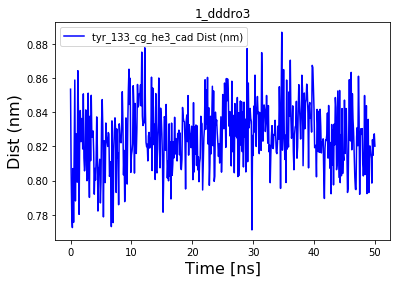

"\nfig, ax1 = plt.subplots()\nax1.plot(time/10, tyr_248_thr_312_dist, 'y')\nax1.set_xlabel('Time [ns]', size=16)\nax1.set_ylabel('Tyr248_Thr312 Dist (nm)', size=16, color='y')\nax2 = ax1.twinx()\nax2.plot(time/10, tyr_248_thr_312_ang*180/np.pi, 'g')\nax2.set_ylabel('Tyr248_Thr312 Ang (degree)', size=16, color='g')\ntitle('1_dddro3')\nsavefig('1_dddro3_y248_t312_time.png')\nshow()\n\nplot(time/10, tyr_248_thr_315_dist, 'r')\nxlabel('Time [ns]', size=16)\nylabel('Tyr248_Thr315 Dist (nm)', size=16, color='r')\ntitle('1_dddro3')\nsavefig('1_dddro3_y248_t315_dist.png')\nshow()\n"

In [12]:
from matplotlib.pylab import *
time=np.concatenate((t1.time, (250+t2.time)[1:]), axis=0)
#print(time)


plot(time/10, tyr_133_cg_he3_cad_dist, 'b', label='tyr_133_cg_he3_cad Dist (nm)')
#plot(time/10, tyr_244_thr_312_dist, 'darkorange', label='Tyr244_Thr312 Dist (nm)')
xlabel('Time [ns]', size=16)
ylabel('Dist (nm)', size=16)
legend()
title('1_dddro3')
savefig('/Users/PC/Dropbox/cai/btype_cco/md_alys/png/1_dddro3_tyr_133_cg_he3_cad.png')
show()

"""
fig, ax1 = plt.subplots()
ax1.plot(time/10, tyr_248_thr_312_dist, 'y')
ax1.set_xlabel('Time [ns]', size=16)
ax1.set_ylabel('Tyr248_Thr312 Dist (nm)', size=16, color='y')
ax2 = ax1.twinx()
ax2.plot(time/10, tyr_248_thr_312_ang*180/np.pi, 'g')
ax2.set_ylabel('Tyr248_Thr312 Ang (degree)', size=16, color='g')
title('1_dddro3')
savefig('1_dddro3_y248_t312_time.png')
show()

plot(time/10, tyr_248_thr_315_dist, 'r')
xlabel('Time [ns]', size=16)
ylabel('Tyr248_Thr315 Dist (nm)', size=16, color='r')
title('1_dddro3')
savefig('1_dddro3_y248_t315_dist.png')
show()
"""


In [13]:
##compute distances 
tyr_133_oh=tyr_133[-8]
he3_o2d=he3[-1]
he3_o1d=he3[-2]
tyr_133_oh_he3_o1d_pair= np.asarray([[tyr_133_oh.index, he3_o1d.index]])
tyr_133_oh_he3_o2d_pair= np.asarray([[tyr_133_oh.index, he3_o2d.index]])

#print(tyr_133_cg_he3_cad_pair)

tyr_133_oh_he3_o1d_dist1=md.compute_distances(t1, tyr_133_oh_he3_o1d_pair, periodic=True)
tyr_133_oh_he3_o1d_dist2=md.compute_distances(t2, tyr_133_oh_he3_o1d_pair, periodic=True)

tyr_133_oh_he3_o2d_dist1=md.compute_distances(t1, tyr_133_oh_he3_o2d_pair, periodic=True)
tyr_133_oh_he3_o2d_dist2=md.compute_distances(t2, tyr_133_oh_he3_o2d_pair, periodic=True)

#print(tyr_133_cg_he3_cad_dist1[-1],tyr_133_cg_he3_cad_dist2[0])
tyr_133_oh_he3_o1d_dist=np.concatenate((tyr_133_oh_he3_o1d_dist1, tyr_133_oh_he3_o1d_dist2[1:]), axis=0)
tyr_133_oh_he3_o2d_dist=np.concatenate((tyr_133_oh_he3_o2d_dist1, tyr_133_oh_he3_o2d_dist2[1:]), axis=0)

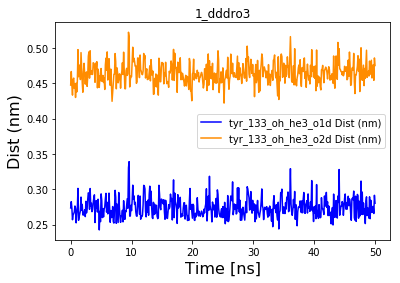

In [14]:
from matplotlib.pylab import *
time=np.concatenate((t1.time, (250+t2.time)[1:]), axis=0)
#print(time)


plot(time/10, tyr_133_oh_he3_o1d_dist, 'b', label='tyr_133_oh_he3_o1d Dist (nm)')
plot(time/10, tyr_133_oh_he3_o2d_dist, 'darkorange', label='tyr_133_oh_he3_o2d Dist (nm)')
xlabel('Time [ns]', size=16)
ylabel('Dist (nm)', size=16)
legend()
title('1_dddro3')
savefig('/Users/PC/Dropbox/cai/btype_cco/md_alys/png/1_dddro3_tyr_133_oh_he3_od.png')
show()


In [4]:
pddro2_t1 = md.load('/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/2_pddro3/md_nvt_12ns_100.dcd',\
             top='/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/2_pddro3/md_nvt_init.pdb')
pddro2_t2 = md.load('/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/2_pddro3/md_nvt_25ns_100.dcd',\
             top='/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/2_pddro3/md_nvt_12ns.pdb')
pddro2_t3=md.load('/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/2_pddro3/md_nvt_50ns_100.dcd',\
             top='/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/2_pddro3/md_nvt_25ns.pdb')

pddro2_t=pddro2_t1.join(pddro2_t2, check_topology=True, discard_overlapping_frames=True)
pddro2_t=pddro2_t.join(pddro2_t3, check_topology=True, discard_overlapping_frames=True)


In [77]:
print([atom for atom in pddro2_t.topology.atoms if ((atom.residue.name == 'TYR') and (atom.residue.index == 126))])
print([atom for atom in pddro2_t.topology.atoms if ((atom.residue.name == 'HEM') and (atom.residue.index == 0))])

[TYR127-N, TYR127-H, TYR127-CA, TYR127-HA, TYR127-CB, TYR127-HB3, TYR127-HB2, TYR127-CG, TYR127-CD1, TYR127-HD1, TYR127-CE1, TYR127-HE1, TYR127-CZ, TYR127-OH, TYR127-HH, TYR127-CD2, TYR127-HD2, TYR127-CE2, TYR127-HE2, TYR127-C, TYR127-O]
[HEM1-OO, HEM1-FE, HEM1-NA, HEM1-NB, HEM1-NC, HEM1-ND, HEM1-C1A, HEM1-C2A, HEM1-C3A, HEM1-C4A, HEM1-C1B, HEM1-C2B, HEM1-C3B, HEM1-C4B, HEM1-C1C, HEM1-C2C, HEM1-C3C, HEM1-C4C, HEM1-C1D, HEM1-C2D, HEM1-C3D, HEM1-C4D, HEM1-CHA, HEM1-HA, HEM1-CHB, HEM1-HB, HEM1-CHC, HEM1-HC, HEM1-CHD, HEM1-HD, HEM1-CMA, HEM1-OMA, HEM1-HMA1, HEM1-CAA, HEM1-HAA1, HEM1-HAA2, HEM1-CBA, HEM1-HBA1, HEM1-HBA2, HEM1-CGA, HEM1-O1A, HEM1-O2A, HEM1-H2A, HEM1-CMB, HEM1-HMB1, HEM1-HMB2, HEM1-HMB3, HEM1-C11, HEM1-O11, HEM1-H11A, HEM1-H11B, HEM1-C12, HEM1-H12A, HEM1-H12B, HEM1-C13, HEM1-H13A, HEM1-H13B, HEM1-C14, HEM1-H14A, HEM1-C15, HEM1-C26, HEM1-H26A, HEM1-H26B, HEM1-H26C, HEM1-C16, HEM1-H16A, HEM1-H16B, HEM1-C17, HEM1-H17A, HEM1-H17B, HEM1-C18, HEM1-H18A, HEM1-C19, HEM1-C27, HEM1-H27

In [87]:
##compute distances 
pddro2_tyr_133=[atom for atom in pddro2_t.topology.atoms if ((atom.residue.name == 'TYR') and (atom.residue.index == 126))]
pddro2_he3=[atom for atom in pddro2_t.topology.atoms if ((atom.residue.name == 'HEM') and (atom.residue.index == 0))]
pddro2_tyr_133_oh=pddro2_tyr_133[-8]
pddro2_he3_o2d=pddro2_he3[-1]
pddro2_he3_o1d=pddro2_he3[-2]
pddro2_tyr_133_oh_he3_o1d_pair= np.asarray([[pddro2_tyr_133_oh.index, pddro2_he3_o1d.index]])
pddro2_tyr_133_oh_he3_o2d_pair= np.asarray([[pddro2_tyr_133_oh.index, pddro2_he3_o2d.index]])

#print(tyr_133_cg_he3_cad_pair)

pddro2_tyr_133_oh_he3_o1d_dist=md.compute_distances(pddro2_t, pddro2_tyr_133_oh_he3_o1d_pair, periodic=True)


pddro2_tyr_133_oh_he3_o2d_dist=md.compute_distances(pddro2_t, pddro2_tyr_133_oh_he3_o2d_pair, periodic=True)



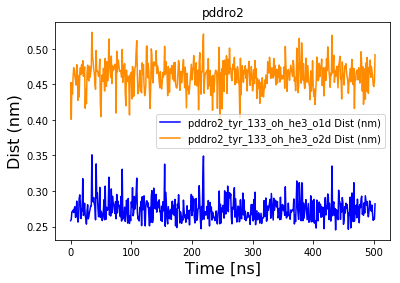

In [88]:
from matplotlib.pylab import *
#time=np.concatenate((t1.time, (250+t2.time)[1:]), axis=0)
#print(time)


plot( pddro2_tyr_133_oh_he3_o1d_dist, 'b', label='pddro2_tyr_133_oh_he3_o1d Dist (nm)')
plot( pddro2_tyr_133_oh_he3_o2d_dist, 'darkorange', label='pddro2_tyr_133_oh_he3_o2d Dist (nm)')
xlabel('Time [ns]', size=16)
ylabel('Dist (nm)', size=16)
legend()
title('pddro2')
savefig('/Users/PC/Dropbox/cai/btype_cco/md_alys/png/pddro2_tyr_133_oh_he3_od.png')
show()


In [5]:
ppdro3_t1 = md.load('/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/3_ppdro3_f3/md_nvt_12ns_100.dcd',\
             top='/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/3_ppdro3_f3/md_nvt_init.pdb')
ppdro3_t2 = md.load('/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/3_ppdro3_f3/md_nvt_25ns_100.dcd',\
             top='/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/3_ppdro3_f3/md_nvt_12ns.pdb')
ppdro3_t3=md.load('/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/3_ppdro3_f3/md_nvt_37ns_100.dcd',\
             top='/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/3_ppdro3_f3/md_nvt_25ns.pdb')
ppdro3_t4=md.load('/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/3_ppdro3_f3/md_nvt_50ns_100.dcd',\
             top='/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/3_ppdro3_f3/md_nvt_37ns.pdb')
ppdro3_t=ppdro3_t1.join(ppdro3_t2, check_topology=True, discard_overlapping_frames=True)
ppdro3_t=ppdro3_t.join(ppdro3_t3, check_topology=True, discard_overlapping_frames=True)
ppdro3_t=ppdro3_t.join(ppdro3_t4, check_topology=True, discard_overlapping_frames=True)

In [72]:
print([atom for atom in ppdro3_t.topology.atoms if ((atom.residue.name == 'TYR') and (atom.residue.index == 126))])
print([atom for atom in ppdro3_t.topology.atoms if ((atom.residue.name == 'HEM') and (atom.residue.index == 0))])

[TYR127-N, TYR127-H, TYR127-CA, TYR127-HA, TYR127-CB, TYR127-HB3, TYR127-HB2, TYR127-CG, TYR127-CD1, TYR127-HD1, TYR127-CE1, TYR127-HE1, TYR127-CZ, TYR127-OH, TYR127-HH, TYR127-CD2, TYR127-HD2, TYR127-CE2, TYR127-HE2, TYR127-C, TYR127-O]
[HEM1-OO, HEM1-FE, HEM1-NA, HEM1-NB, HEM1-NC, HEM1-ND, HEM1-C1A, HEM1-C2A, HEM1-C3A, HEM1-C4A, HEM1-C1B, HEM1-C2B, HEM1-C3B, HEM1-C4B, HEM1-C1C, HEM1-C2C, HEM1-C3C, HEM1-C4C, HEM1-C1D, HEM1-C2D, HEM1-C3D, HEM1-C4D, HEM1-CHA, HEM1-HA, HEM1-CHB, HEM1-HB, HEM1-CHC, HEM1-HC, HEM1-CHD, HEM1-HD, HEM1-CMA, HEM1-OMA, HEM1-HMA1, HEM1-CAA, HEM1-HAA1, HEM1-HAA2, HEM1-CBA, HEM1-HBA1, HEM1-HBA2, HEM1-CGA, HEM1-O1A, HEM1-O2A, HEM1-H2A, HEM1-CMB, HEM1-HMB1, HEM1-HMB2, HEM1-HMB3, HEM1-C11, HEM1-O11, HEM1-H11A, HEM1-H11B, HEM1-C12, HEM1-H12A, HEM1-H12B, HEM1-C13, HEM1-H13A, HEM1-H13B, HEM1-C14, HEM1-H14A, HEM1-C15, HEM1-C26, HEM1-H26A, HEM1-H26B, HEM1-H26C, HEM1-C16, HEM1-H16A, HEM1-H16B, HEM1-C17, HEM1-H17A, HEM1-H17B, HEM1-C18, HEM1-H18A, HEM1-C19, HEM1-C27, HEM1-H27

In [104]:
##compute distances 
ppdro3_tyr_133=[atom for atom in ppdro3_t.topology.atoms if ((atom.residue.name == 'TYR') and (atom.residue.index == 126))]
ppdro3_he3=[atom for atom in ppdro3_t.topology.atoms if ((atom.residue.name == 'HEM') and (atom.residue.index == 0))]
ppdro3_tyr_133_oh=ppdro3_tyr_133[-8]
ppdro3_he3_o2d=ppdro3_he3[-1]
ppdro3_he3_o1d=ppdro3_he3[-2]
ppdro3_tyr_133_oh_he3_o1d_pair= np.asarray([[ppdro3_tyr_133_oh.index, ppdro3_he3_o1d.index]])
ppdro3_tyr_133_oh_he3_o2d_pair= np.asarray([[ppdro3_tyr_133_oh.index, ppdro3_he3_o2d.index]])

#print(tyr_133_cg_he3_cad_pair)

ppdro3_tyr_133_oh_he3_o1d_dist=md.compute_distances(ppdro3_t, ppdro3_tyr_133_oh_he3_o1d_pair, periodic=True)


ppdro3_tyr_133_oh_he3_o2d_dist=md.compute_distances(ppdro3_t, ppdro3_tyr_133_oh_he3_o2d_pair, periodic=True)


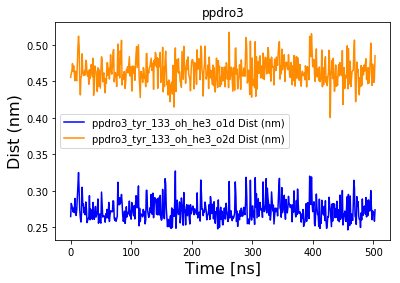

In [105]:
from matplotlib.pylab import *
#time=np.concatenate((t1.time, (250+t2.time)[1:]), axis=0)
#print(time)


plot( ppdro3_tyr_133_oh_he3_o1d_dist, 'b', label='ppdro3_tyr_133_oh_he3_o1d Dist (nm)')
plot( ppdro3_tyr_133_oh_he3_o2d_dist, 'darkorange', label='ppdro3_tyr_133_oh_he3_o2d Dist (nm)')
xlabel('Time [ns]', size=16)
ylabel('Dist (nm)', size=16)
legend()
title('ppdro3')
savefig('/Users/PC/Dropbox/cai/btype_cco/md_alys/png/ppdro3_tyr_133_oh_he3_od.png')
show()


In [6]:
dpdro3_t = md.load('/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/4_dpdro3/md_nvt_25ns_100.dcd',\
             top='/Users/PC/Dropbox/cai/btype_cco/snapshot/Btype_CcO_MD/Btype_MD/4_dpdro3/md_nvt_init.pdb')

In [103]:
print([atom for atom in dpdro3_t.topology.atoms if ((atom.residue.name == 'TYR') and (atom.residue.index == 126))])
print([atom for atom in dpdro3_t.topology.atoms if ((atom.residue.name == 'HEM') and (atom.residue.index == 0))])

[TYR127-N, TYR127-H, TYR127-CA, TYR127-HA, TYR127-CB, TYR127-HB3, TYR127-HB2, TYR127-CG, TYR127-CD1, TYR127-HD1, TYR127-CE1, TYR127-HE1, TYR127-CZ, TYR127-OH, TYR127-HH, TYR127-CD2, TYR127-HD2, TYR127-CE2, TYR127-HE2, TYR127-C, TYR127-O]
[HEM1-OO, HEM1-FE, HEM1-NA, HEM1-NB, HEM1-NC, HEM1-ND, HEM1-C1A, HEM1-C2A, HEM1-C3A, HEM1-C4A, HEM1-C1B, HEM1-C2B, HEM1-C3B, HEM1-C4B, HEM1-C1C, HEM1-C2C, HEM1-C3C, HEM1-C4C, HEM1-C1D, HEM1-C2D, HEM1-C3D, HEM1-C4D, HEM1-CHA, HEM1-HA, HEM1-CHB, HEM1-HB, HEM1-CHC, HEM1-HC, HEM1-CHD, HEM1-HD, HEM1-CMA, HEM1-OMA, HEM1-HMA1, HEM1-CAA, HEM1-HAA1, HEM1-HAA2, HEM1-CBA, HEM1-HBA1, HEM1-HBA2, HEM1-CGA, HEM1-O1A, HEM1-O2A, HEM1-CMB, HEM1-HMB1, HEM1-HMB2, HEM1-HMB3, HEM1-C11, HEM1-O11, HEM1-H11A, HEM1-H11B, HEM1-C12, HEM1-H12A, HEM1-H12B, HEM1-C13, HEM1-H13A, HEM1-H13B, HEM1-C14, HEM1-H14A, HEM1-C15, HEM1-C26, HEM1-H26A, HEM1-H26B, HEM1-H26C, HEM1-C16, HEM1-H16A, HEM1-H16B, HEM1-C17, HEM1-H17A, HEM1-H17B, HEM1-C18, HEM1-H18A, HEM1-C19, HEM1-C27, HEM1-H27A, HEM1-H2

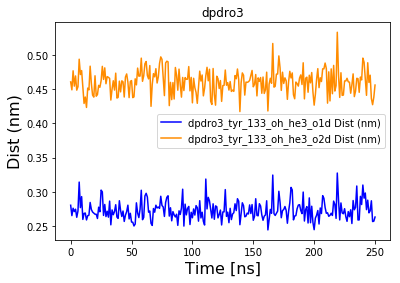

In [107]:
##compute distances 
dpdro3_tyr_133=[atom for atom in dpdro3_t.topology.atoms if ((atom.residue.name == 'TYR') and (atom.residue.index == 126))]
dpdro3_he3=[atom for atom in dpdro3_t.topology.atoms if ((atom.residue.name == 'HEM') and (atom.residue.index == 0))]
dpdro3_tyr_133_oh=dpdro3_tyr_133[-8]
dpdro3_he3_o2d=dpdro3_he3[-1]
dpdro3_he3_o1d=dpdro3_he3[-2]
dpdro3_tyr_133_oh_he3_o1d_pair= np.asarray([[dpdro3_tyr_133_oh.index, dpdro3_he3_o1d.index]])
dpdro3_tyr_133_oh_he3_o2d_pair= np.asarray([[dpdro3_tyr_133_oh.index, dpdro3_he3_o2d.index]])

#print(tyr_133_cg_he3_cad_pair)

dpdro3_tyr_133_oh_he3_o1d_dist=md.compute_distances(dpdro3_t, dpdro3_tyr_133_oh_he3_o1d_pair, periodic=True)


dpdro3_tyr_133_oh_he3_o2d_dist=md.compute_distances(dpdro3_t, dpdro3_tyr_133_oh_he3_o2d_pair, periodic=True)





from matplotlib.pylab import *
#time=np.concatenate((t1.time, (250+t2.time)[1:]), axis=0)
#print(time)


plot( dpdro3_tyr_133_oh_he3_o1d_dist, 'b', label='dpdro3_tyr_133_oh_he3_o1d Dist (nm)')
plot( dpdro3_tyr_133_oh_he3_o2d_dist, 'darkorange', label='dpdro3_tyr_133_oh_he3_o2d Dist (nm)')
xlabel('Time [ns]', size=16)
ylabel('Dist (nm)', size=16)
legend()
title('dpdro3')
savefig('/Users/PC/Dropbox/cai/btype_cco/md_alys/png/dpdro3_tyr_133_oh_he3_od.png')
show()



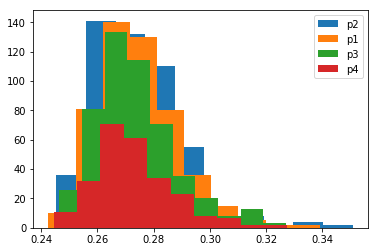

In [108]:
import matplotlib.pyplot as plt
plt.hist(pddro2_tyr_133_oh_he3_o1d_dist, label='p2')
plt.hist(tyr_133_oh_he3_o1d_dist,label='p1')
plt.hist(ppdro3_tyr_133_oh_he3_o1d_dist,label='p3')
plt.hist(dpdro3_tyr_133_oh_he3_o1d_dist,label='p4')
plt.legend()
plt.show()

In [62]:
print([atom for atom in dpdro3_t.topology.atoms if ((atom.residue.name == 'ASP') and (atom.residue.index == 365))])
print([atom for atom in dpdro3_t.topology.atoms if ((atom.residue.name == 'HEM') and (atom.residue.index == 0))])
print([atom for atom in dpdro3_t.topology.atoms if ((atom.residue.name == 'ARG') and (atom.residue.index == 218))])
print([atom for atom in dpdro3_t.topology.atoms if ((atom.residue.name == 'TYR') and (atom.residue.index == 129))])
print([atom for atom in dpdro3_t.topology.atoms if ((atom.residue.name == 'ASN') and (atom.residue.index == 705))])
print([atom for atom in dpdro3_t.topology.atoms if ((atom.residue.name == 'ASN') and (atom.residue.index == 370))])
print([atom for atom in dpdro3_t.topology.atoms if ((atom.residue.name == 'HIS') and (atom.residue.index == 369))])

[ASP366-N, ASP366-H, ASP366-CA, ASP366-HA, ASP366-CB, ASP366-HB3, ASP366-HB2, ASP366-CG, ASP366-OD1, ASP366-OD2, ASP366-C, ASP366-O]
[HEM1-OO, HEM1-FE, HEM1-NA, HEM1-NB, HEM1-NC, HEM1-ND, HEM1-C1A, HEM1-C2A, HEM1-C3A, HEM1-C4A, HEM1-C1B, HEM1-C2B, HEM1-C3B, HEM1-C4B, HEM1-C1C, HEM1-C2C, HEM1-C3C, HEM1-C4C, HEM1-C1D, HEM1-C2D, HEM1-C3D, HEM1-C4D, HEM1-CHA, HEM1-HA, HEM1-CHB, HEM1-HB, HEM1-CHC, HEM1-HC, HEM1-CHD, HEM1-HD, HEM1-CMA, HEM1-OMA, HEM1-HMA1, HEM1-CAA, HEM1-HAA1, HEM1-HAA2, HEM1-CBA, HEM1-HBA1, HEM1-HBA2, HEM1-CGA, HEM1-O1A, HEM1-O2A, HEM1-CMB, HEM1-HMB1, HEM1-HMB2, HEM1-HMB3, HEM1-C11, HEM1-O11, HEM1-H11A, HEM1-H11B, HEM1-C12, HEM1-H12A, HEM1-H12B, HEM1-C13, HEM1-H13A, HEM1-H13B, HEM1-C14, HEM1-H14A, HEM1-C15, HEM1-C26, HEM1-H26A, HEM1-H26B, HEM1-H26C, HEM1-C16, HEM1-H16A, HEM1-H16B, HEM1-C17, HEM1-H17A, HEM1-H17B, HEM1-C18, HEM1-H18A, HEM1-C19, HEM1-C27, HEM1-H27A, HEM1-H27B, HEM1-H27C, HEM1-C20, HEM1-H20A, HEM1-H20B, HEM1-C21, HEM1-H21A, HEM1-H21B, HEM1-C22, HEM1-H22A, HEM1-

In [86]:
##compute distances 
trj=[dddro3_t, pddro2_t, ppdro3_t, dpdro3_t ]
asp_372={}
he3={}
arg_225={}
tyr_136={}
asn_150b={}
asn_377={}
his_376={}
asp_372_pra3_pair1_dist={}
asp_372_pra3_pair4_dist={}
asp_372_pra3_pair2_dist={}
asp_372_pra3_pair3_dist={}
arg_225_tyr_136_pair_dist={}
asn_150b_his_376_pair_dist={}
asn_377_his_376_pair_dist={}

for i, item in enumerate(trj):
    #print(item)
    asp_372[i]=[atom for atom in item.topology.atoms if ((atom.residue.name == 'ASP') and (atom.residue.index == 365))]
    he3[i]=[atom for atom in item.topology.atoms if ((atom.residue.name == 'HEM') and (atom.residue.index == 0))]
    arg_225[i]=[atom for atom in item.topology.atoms if ((atom.residue.name == 'ARG') and (atom.residue.index == 218))]
    tyr_136[i]=[atom for atom in item.topology.atoms if ((atom.residue.name == 'TYR') and (atom.residue.index == 129))]
    asn_150b[i]=[atom for atom in item.topology.atoms if ((atom.residue.name == 'ASN') and (atom.residue.index == 705))]
    asn_377[i]=[atom for atom in item.topology.atoms if ((atom.residue.name == 'ASN') and (atom.residue.index == 370))]
    his_376[i]=[atom for atom in item.topology.atoms if ((atom.residue.name == 'HIS') and (atom.residue.index == 369))]
    
    asp_372_pra3_pair1=np.asarray([[asp_372[i][-4].index, he3[i][40].index]])
    asp_372_pra3_pair2=np.asarray([[asp_372[i][-4].index, he3[i][41].index]])
    asp_372_pra3_pair3=np.asarray([[asp_372[i][-3].index, he3[i][40].index]])
    asp_372_pra3_pair4=np.asarray([[asp_372[i][-3].index, he3[i][41].index]])
    
    arg_225_tyr_136_pair=np.asarray([[arg_225[i][-8].index, tyr_136[i][-8].index]])
    
    asn_150b_his_376_pair=np.asarray([[asn_150b[i][-7].index, his_376[i][-8].index]])
    
    asn_377_his_376_pair=np.asarray([[asn_377[i][-7].index, his_376[i][-8].index]])
    
    
    asp_372_pra3_pair1_dist[i]=md.compute_distances(item, asp_372_pra3_pair1, periodic=True)
    asp_372_pra3_pair2_dist[i]=md.compute_distances(item, asp_372_pra3_pair2, periodic=True)
    asp_372_pra3_pair3_dist[i]=md.compute_distances(item, asp_372_pra3_pair3, periodic=True)
    asp_372_pra3_pair4_dist[i]=md.compute_distances(item, asp_372_pra3_pair4, periodic=True)
    arg_225_tyr_136_pair_dist[i]=md.compute_distances(item, arg_225_tyr_136_pair, periodic=True)
    asn_150b_his_376_pair_dist[i]=md.compute_distances(item, asn_150b_his_376_pair, periodic=True)
    asn_377_his_376_pair_dist[i]=md.compute_distances(item, asn_377_his_376_pair, periodic=True)
    



#print(asp_372)


In [84]:
print(asn_150b[i][-7], his_376[i][-8])

ASN148-CG HIS370-CG


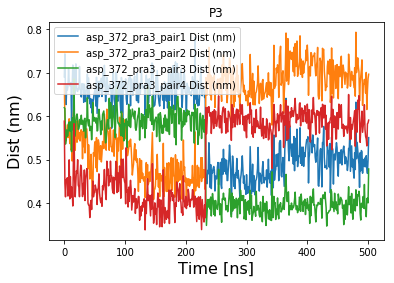

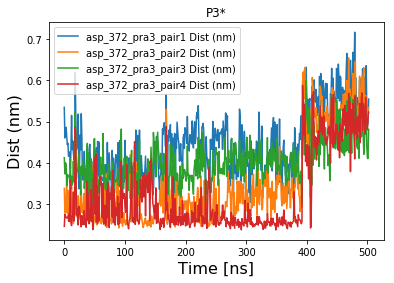

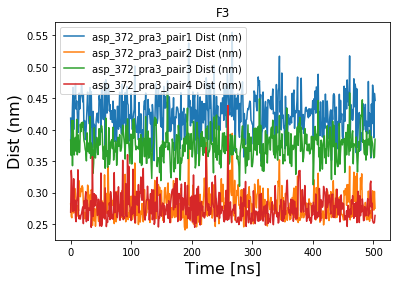

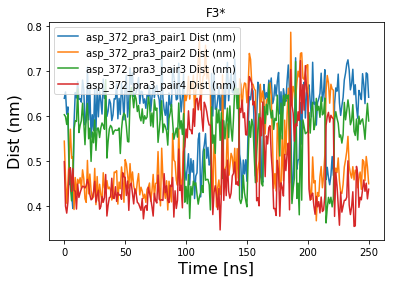

In [99]:
from matplotlib.pylab import *
titles=['P3','P3*','F3','F3*']

for i, item in enumerate(trj): 
    plot( asp_372_pra3_pair1_dist[i], label='asp_372_pra3_pair1 Dist (nm)')
    plot( asp_372_pra3_pair2_dist[i],  label='asp_372_pra3_pair2 Dist (nm)')
    plot( asp_372_pra3_pair3_dist[i],  label='asp_372_pra3_pair3 Dist (nm)')
    plot( asp_372_pra3_pair4_dist[i],  label='asp_372_pra3_pair4 Dist (nm)')
    #plot( arg_225_tyr_136_pair_dist[i],  label='arg_225_tyr_136_pair Dist (nm)')
    #plot( asn_150b_his_376_pair_dist[i],  label='asn_150b_his_376_pair Dist (nm)')
    #plot( asn_377_his_376_pair_dist[i],  label='asn_377_his_376_pair Dist (nm)')
    xlabel('Time [ns]', size=16)
    ylabel('Dist (nm)', size=16)
    legend()
    title(titles[i])
    #savefig('/Users/PC/Dropbox/cai/btype_cco/md_alys/png/item.png)
    show()


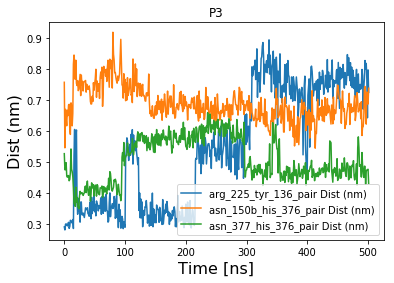

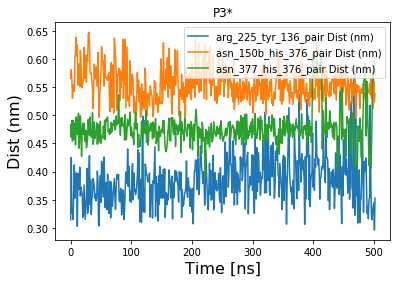

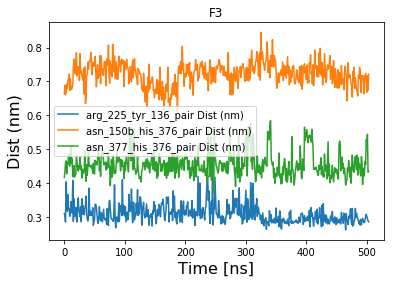

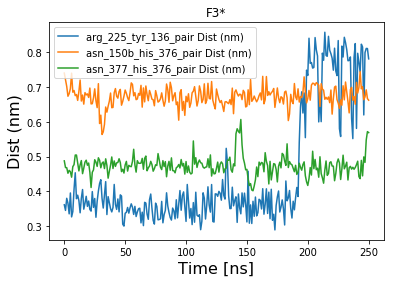

In [98]:
titles=['P3','P3*','F3','F3*']
for i, item in enumerate(trj): 
    #plot( asp_372_pra3_pair1_dist[i], label='asp_372_pra3_pair1 Dist (nm)')
    #plot( asp_372_pra3_pair2_dist[i],  label='asp_372_pra3_pair2 Dist (nm)')
    #plot( asp_372_pra3_pair3_dist[i],  label='asp_372_pra3_pair3 Dist (nm)')
    #plot( asp_372_pra3_pair4_dist[i],  label='asp_372_pra3_pair4 Dist (nm)')
    plot( arg_225_tyr_136_pair_dist[i],  label='arg_225_tyr_136_pair Dist (nm)')
    plot( asn_150b_his_376_pair_dist[i],  label='asn_150b_his_376_pair Dist (nm)')
    plot( asn_377_his_376_pair_dist[i],  label='asn_377_his_376_pair Dist (nm)')
    xlabel('Time [ns]', size=16)
    ylabel('Dist (nm)', size=16)
    legend()
    title(titles[i])
    #savefig('/Users/PC/Dropbox/cai/btype_cco/md_alys/png/item.png)
    show()


In [56]:
fig, ax1 = plt.subplots(ax1.plot(tyr_248_thr_312_dist,tyr_248_thr_312_ang*180/np.pi,'yo')
ax1.set_xlabel('Tyr248_Thr312 Dist (nm)', size=16)
ax1.set_ylabel('Tyr248_Thr312 Ang (degree)', size=16, color='y')
title('1_dddro3')
savefig('1_dddro3_y248_t312.png')
show()

SyntaxError: invalid syntax (<ipython-input-56-67c89dd8cd59>, line 2)

In [11]:
def if_hb(trj, don_at, don_h, acc_at):
    #input trajectory, donor atom, donor H and acceptor atom in a trajectory, 
    #return 1 if hydrogen bonded between the supplied atoms in each frame of a trajectory, 0 otherwise
    #criterior: distance Donor atom ---acceptor atom dist < 4.0 anstrom, angle >90 degree
    pair= np.asarray([[don_at.index, acc_at.index]])
    tup=np.asarray([[don_at.index,don_h.index,acc_at.index]])
    dist=md.compute_distances(trj, pair, periodic=False)
    ang=md.compute_angles(trj, tup, periodic=False)
    
    
    hbs=[]
    for i in range(trj.n_frames):
        if ((dist[i])*10 < 4.0) and ((ang[i])*180/np.pi > 90 ) :
            hb=[1]
        else: 
            hb=[0]
            #print('broken')
        hbs.append(hb)
    return np.asarray(hbs)

In [12]:
hb_tyr248_thr312_1=if_hb(t1,tyr_248_o, tyr_248_h, thr_312_o)
hb_tyr248_thr312_2=if_hb(t2,tyr_248_o, tyr_248_h, thr_312_o)
hb_tyr248_thr312=np.concatenate((hb_tyr248_thr312_1, hb_tyr248_thr312_2[1:]), axis=0)

hb_thr315_tyr248_1=if_hb(t1,thr_315_o, thr_315_h, tyr_248_o)
hb_thr315_tyr248_2=if_hb(t2,thr_315_o, thr_315_h, tyr_248_o)
hb_thr315_tyr248=np.concatenate((hb_thr315_tyr248_1, hb_thr315_tyr248_2[1:]), axis=0)

hb_thr312_tyr244_1=if_hb(t1,thr_312_o, thr_312_h, tyr_244_o)
hb_thr312_tyr244_2=if_hb(t2,thr_312_o, thr_312_h, tyr_244_o)
hb_thr312_tyr244=np.concatenate((hb_thr312_tyr244_1, hb_thr312_tyr244_2[1:]), axis=0)

In [13]:
def trip_point(f1,f2,f3):
    tri_points=[]
    for i in range(len(f1)):
        if (f1[i]==f2[i]==f3[i]):
            tri_point=[i,f1[i]]
            tri_points.append(tri_point)
    return tri_points

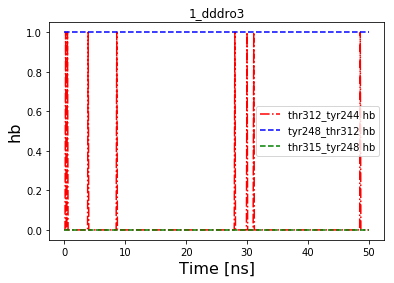

In [14]:
time=np.concatenate((t1.time, (250+t2.time)[1:]), axis=0)
#print(time)

plot(time/10, hb_thr312_tyr244, 'r-.', label='thr312_tyr244 hb')
plot(time/10, hb_tyr248_thr312, 'b--', label='tyr248_thr312 hb')
plot(time/10, hb_thr315_tyr248, 'g--', label='thr315_tyr248 hb')
'''
##plot triple points
trip_points=trip_point(hb_thr312_tyr244,hb_tyr248_thr312,hb_thr315_tyr248)
#print(trip_points)
tri_real_times=[]
tri_points=[]
for i in range(len(trip_points)):
    tri_time=trip_points[i][0]
    tri_real_time=time[tri_time]/10
    #print(tri_real_time)
    tri_point=trip_points[i][1]
    tri_real_times.append(tri_real_time)
    tri_points.append(tri_point)
#print(tri_real_times)
plt.plot(tri_real_times, tri_points, 'r^')
##
'''
xlabel('Time [ns]', size=16)
ylabel('hb', size=16)
legend()
title('1_dddro3')
savefig('1_dddro3.png')
show()


In [25]:
def dist_ang(trj, don_at, don_h, acc_at):
    #input trajectory, donor atom, donor H and acceptor atom in a trajectory, 
    #return distance between don_atom and acc_atom and the angle between them.
    pair= np.asarray([[don_at.index, acc_at.index]])
    tup=np.asarray([[don_at.index,don_h.index,acc_at.index]])
    dist=md.compute_distances(trj, pair, periodic=False)
    ang=md.compute_angles(trj, tup, periodic=False)
    return dist, ang

In [119]:
tyr248_thr312_dist_1,tyr248_thr312_ang_1 =dist_ang(t1,tyr_248_o, tyr_248_h, thr_312_o)
tyr248_thr312_dist_2,tyr248_thr312_ang_2 =dist_ang(t2,tyr_248_o, tyr_248_h, thr_312_o)
tyr248_thr312_dist=np.concatenate((tyr248_thr312_dist_1, tyr248_thr312_dist_2[1:]), axis=0)
tyr248_thr312_ang=np.concatenate((tyr248_thr312_ang_1, tyr248_thr312_ang_2[1:]), axis=0)

thr315_tyr248_dist_1,thr315_tyr248_ang_1 =dist_ang(t1,thr_315_o, thr_315_h, tyr_248_o)
thr315_tyr248_dist_2,thr315_tyr248_ang_2=dist_ang(t2,thr_315_o, thr_315_h, tyr_248_o)
thr315_tyr248_dist=np.concatenate((thr315_tyr248_dist_1, thr315_tyr248_dist_2[1:]), axis=0)
thr315_tyr248_ang=np.concatenate((thr315_tyr248_ang_1, thr315_tyr248_ang_2[1:]), axis=0)

thr312_tyr244_dist_1,thr312_tyr244_ang_1=dist_ang(t1,thr_312_o, thr_312_h, tyr_244_o)
thr312_tyr244_dist_2,thr312_tyr244_ang_2=dist_ang(t2,thr_312_o, thr_312_h, tyr_244_o)
thr312_tyr244_dist=np.concatenate((thr312_tyr244_dist_1, thr312_tyr244_dist_2[1:]), axis=0)
thr312_tyr244_ang=np.concatenate((thr312_tyr244_ang_1, thr312_tyr244_ang_2[1:]), axis=0)

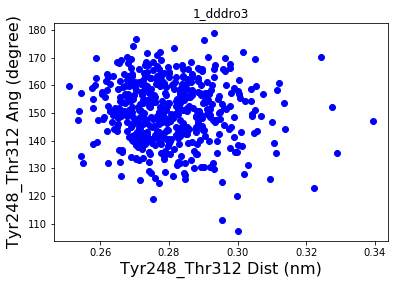

In [33]:
fig, ax1 = plt.subplots()
ax1.plot(tyr248_thr312_dist,tyr248_thr312_ang*180/np.pi,'bo')
ax1.set_xlabel('Tyr248_Thr312 Dist (nm)', size=16)
ax1.set_ylabel('Tyr248_Thr312 Ang (degree)', size=16)
title('1_dddro3')
savefig('1_dddro3_y248_t312.png')
show()

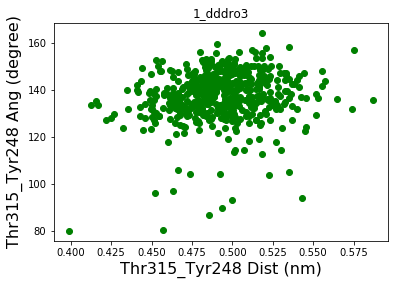

In [35]:
fig, ax1 = plt.subplots()
ax1.plot(thr315_tyr248_dist,thr315_tyr248_ang*180/np.pi,'go')
ax1.set_xlabel('Thr315_Tyr248 Dist (nm)', size=16)
ax1.set_ylabel('Thr315_Tyr248 Ang (degree)', size=16)
title('1_dddro3')
savefig('1_dddro3_t315_y248.png')
show()

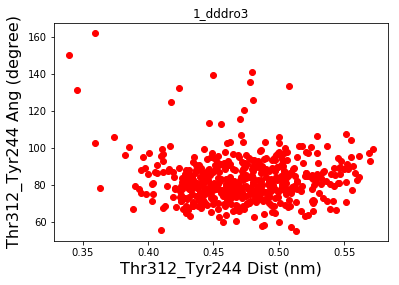

In [36]:
fig, ax1 = plt.subplots()
ax1.plot(thr312_tyr244_dist,thr312_tyr244_ang*180/np.pi,'ro')
ax1.set_xlabel('Thr312_Tyr244 Dist (nm)', size=16)
ax1.set_ylabel('Thr312_Tyr244 Ang (degree)', size=16)
title('1_dddro3')
savefig('1_dddro3_t312_y244.png')
show()

In [120]:
q=np.asarray([thr_312_o.index])
haystack=[atom.index for atom in t1.topology.atoms if (atom.residue.is_water and (atom.name == 'O'))]

wat_thr312_1=md.compute_neighbors(t1, 0.4,q,haystack)
wat_thr312_2=md.compute_neighbors(t2, 0.4,q,haystack)
wat_thr312_num_1=[ len(wat_thr312_1[i]) for i in range(len(wat_thr312_1))]
wat_thr312_num_2=[ len(wat_thr312_2[i]) for i in range(len(wat_thr312_2))]
wat_thr312_num=np.concatenate((wat_thr312_num_1, wat_thr312_num_2[1:]), axis=0)



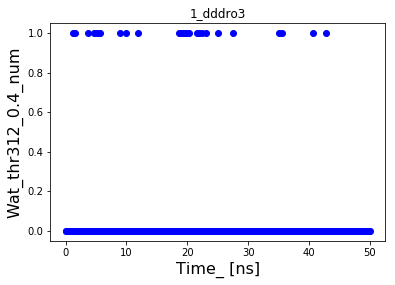

In [135]:
time=np.concatenate((t1.time, (250+t2.time)[1:]), axis=0)
#print(time)

plot(time/10, wat_thr312_num, 'bo')

xlabel('Time_ [ns]', size=16)
ylabel('Wat_thr312_0.4_num', size=16)
title('1_dddro3')
savefig('1_dddro3_wat_thr312_num.png')
show()

NameError: name 'usage' is not defined